<a href="https://colab.research.google.com/github/solana-ametista/JNutrition/blob/main/Implementa%C3%A7%C3%A3o_e_An%C3%A1lise_do_Algoritmo_de_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação do dataset

In [5]:
!wget -O dataset.zip "https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip"

--2025-05-08 21:32:47--  https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [       <=>          ]  58.18M  41.8MB/s    in 1.4s    

2025-05-08 21:32:48 (41.8 MB/s) - ‘dataset.zip’ saved [61005872]



In [6]:
!unzip dataset.zip -d dataset

Archive:  dataset.zip
replace dataset/UCI HAR Dataset.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
!unzip dataset/UCI\ HAR\ Dataset.zip -d "UCI HAR Dataset"

Archive:  dataset/UCI HAR Dataset.zip
replace UCI HAR Dataset/UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
!pip install skimpy

#História do K-Means

Origens

O K-Means tem raízes antigas na estatística e análise de padrões. Ele evoluiu ao longo de décadas:

A primeira formulação do problema de particionar um conjunto de pontos em grupos (clusters) foi feita por Hugo Steinhaus em 1956.

O algoritmo na forma mais próxima da atual foi descrito por Stuart Lloyd em 1957, enquanto trabalhava na Bell Labs, mas seu trabalho só foi publicado oficialmente em 1982. Por isso, o algoritmo às vezes é chamado de "algoritmo de Lloyd".

A expressão “K-Means” foi popularizada por James MacQueen em 1967, que também propôs uma versão iterativa do algoritmo.

#O que o K-Means faz?

O K-Means é um algoritmo de aprendizado não supervisionado usado para agrupamento de dados. Ele tenta particionar um conjunto de n pontos em K grupos (clusters) de forma que os pontos dentro de um cluster sejam mais semelhantes entre si do que com pontos de outros clusters.

#Como funciona o K-Means?
Passo a passo do algoritmo:

Escolher K, o número de clusters desejados.

Inicializar: Seleciona aleatoriamente K pontos como centróides iniciais (centros dos clusters).

Atribuição de clusters: Cada ponto do conjunto de dados é atribuído ao cluster cujo centróide está mais próximo, com base em uma distância (geralmente a distância Euclidiana).

Atualização dos centróides: Calcula-se a média dos pontos atribuídos a cada cluster e atualiza-se o centróide de cada grupo para essa nova média.

Repetição: Repete os passos 3 e 4 até:

Os centróides não mudarem mais (convergência), ou

Alcançar um número máximo de iterações.

O algoritmo visa minimizar a soma das distâncias quadradas dentro dos clusters:

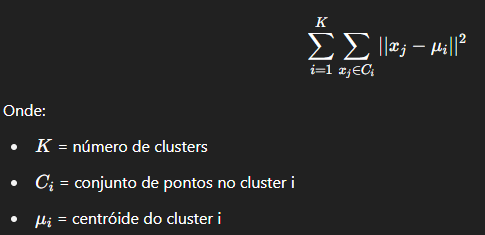

✅ Vantagens do K-Means
Simples e rápido: especialmente eficiente para grandes datasets.

Funciona bem quando os dados têm grupos bem definidos.

Escalável: pode ser otimizado com técnicas como MiniBatchKMeans.

❌ Limitações do K-Means
É necessário escolher K previamente.

Sensível a centróides iniciais: resultados podem variar a cada execução.

Assume clusters esféricos e de tamanho similar (o que nem sempre é verdade).

Não lida bem com outliers ou clusters de formas arbitrárias.

Não detecta relações hierárquicas (ao contrário do clustering hierárquico).



In [9]:
import numpy as np
import pandas as pd

# Carregando os dados para o ambiente de programação
features = list()
with open('/content/UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [10]:
# Carregando os dados para o ambiente de programação
X_train = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features
subject_data = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', header=None)
X_train['subject'] = subject_data.iloc[:, 0]

y_train = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', names=['Activity'])
y_train = y_train.iloc[:, 0]
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(10)

<ipython-input-10-bac3cdf3682e>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3970,0.286482,-0.004199,-0.116146,-0.978447,-0.951647,-0.961970,-0.984710,-0.961820,-0.964288,-0.912973,...,-0.007712,0.064342,0.467554,0.442353,-0.646012,0.307363,0.145917,21,5,STANDING
6961,0.133738,-0.135200,-0.124931,-0.038782,-0.213321,0.066074,-0.130013,-0.205232,-0.008655,0.173423,...,0.174897,0.764123,-0.837022,0.701462,-0.817803,0.222897,0.035760,29,2,WALKING_UPSTAIRS
2322,0.337189,-0.050491,-0.068027,-0.414237,-0.084976,0.031611,-0.450434,-0.097897,-0.038060,-0.198423,...,-0.261461,-0.825821,-0.574463,-0.067407,-0.549888,0.257810,0.290948,14,1,WALKING
6958,0.261849,0.011323,-0.110304,-0.030749,0.204798,0.144739,-0.136240,0.145558,0.151859,0.305123,...,0.292078,-0.184638,-0.835995,0.673259,-0.766710,0.259290,0.022792,29,2,WALKING_UPSTAIRS
4029,0.278119,-0.015703,-0.105943,-0.995081,-0.985766,-0.982248,-0.995754,-0.986405,-0.980804,-0.933621,...,0.061310,0.789953,0.261567,-0.067381,-0.753311,0.107741,0.196544,21,4,SITTING
2320,0.224183,-0.009000,-0.028922,-0.375428,-0.066282,0.026730,-0.432422,-0.049427,-0.014567,-0.018361,...,0.525700,-0.294881,0.762231,-0.505625,-0.529134,0.266488,0.302027,14,1,WALKING
1558,0.320098,-0.011667,-0.127066,-0.222913,0.148453,0.143637,-0.235857,0.100828,0.175979,0.114809,...,-0.524250,0.458773,0.780810,0.557375,-0.835586,0.211816,0.018099,7,1,WALKING
2366,0.363081,0.021725,-0.101069,-0.294486,0.564184,0.495325,-0.330982,0.488513,0.467882,-0.032993,...,-0.161717,-0.827201,-0.965976,0.186907,-0.400157,0.324054,0.365566,14,2,WALKING_UPSTAIRS
3458,0.285280,-0.009897,-0.104641,-0.997223,-0.984648,-0.977982,-0.997383,-0.984242,-0.977207,-0.937436,...,-0.005171,-0.266754,0.796467,-0.771281,-0.636003,0.334975,0.102560,17,5,STANDING
6909,0.291311,0.000651,-0.063825,-0.024613,-0.022978,-0.246450,-0.083266,-0.056649,-0.219656,0.411156,...,-0.087872,-0.400904,-0.963375,-0.668829,-0.875279,0.175191,-0.022805,29,1,WALKING


In [11]:
# Carregando os dados para o ambiente de programção
X_test = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = features
subject_data = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', header=None)
X_test['subject'] = subject_data.iloc[:, 0]

y_test = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', names=['Activity'])
y_test = y_test.iloc[:, 0]
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(10)

<ipython-input-11-361d2b2349f2>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
318,0.335259,0.075462,-0.118182,-0.950643,-0.518899,-0.768599,-0.950647,-0.496787,-0.787852,-0.862443,...,-0.071816,0.132809,0.251627,-0.670420,-0.800657,0.168826,-0.105758,4,5,STANDING
741,0.181678,-0.011138,-0.109621,-0.407764,-0.132109,-0.296447,-0.436419,-0.123867,-0.273246,-0.232453,...,0.893400,0.118846,-0.834336,0.528572,-0.775955,0.200143,0.138890,9,2,WALKING_UPSTAIRS
1861,0.279837,-0.010076,-0.104020,-0.990730,-0.937395,-0.930183,-0.992462,-0.934817,-0.927397,-0.926574,...,0.001598,0.214234,-0.757211,-0.858485,-0.833311,0.199265,-0.039705,18,5,STANDING
2269,0.274923,-0.016150,-0.108435,-0.997138,-0.988926,-0.988976,-0.997759,-0.988546,-0.988336,-0.942542,...,0.384500,0.316987,0.612975,-0.017144,-0.600646,-0.038337,-0.231382,20,4,SITTING
664,0.276697,-0.014802,-0.101553,-0.994083,-0.972906,-0.951681,-0.994796,-0.974134,-0.946566,-0.936605,...,0.036190,0.062992,0.196714,-0.044148,-0.929513,0.046248,0.026220,9,4,SITTING
2367,0.211428,0.008268,-0.138566,-0.170503,-0.016628,-0.205086,-0.230791,-0.003171,-0.248741,0.161086,...,0.482879,-0.668004,-0.684971,-0.060167,-0.487355,0.386954,0.218698,20,2,WALKING_UPSTAIRS
1204,0.274903,-0.022697,-0.132739,-0.998174,-0.988653,-0.988572,-0.998239,-0.988288,-0.987523,-0.943975,...,-0.009924,0.101756,-0.384339,-0.038319,-0.865011,0.185027,0.053518,12,5,STANDING
2085,0.278034,-0.010272,-0.097178,-0.995647,-0.977582,-0.982467,-0.995775,-0.977439,-0.983915,-0.941271,...,0.048150,0.142331,-0.185279,-0.269708,-0.917546,0.141699,0.056848,18,4,SITTING
1737,0.275382,-0.011718,-0.107769,-0.998335,-0.988355,-0.984819,-0.998389,-0.987932,-0.984655,-0.943987,...,0.074273,0.064889,-0.238867,-0.502899,-0.941267,0.061756,-0.008040,13,4,SITTING
2280,0.283065,-0.002635,-0.108014,-0.980150,-0.957408,-0.911603,-0.981954,-0.956441,-0.895251,-0.920106,...,-0.075401,0.322895,0.165361,0.143337,-0.824637,0.110472,-0.109250,20,4,SITTING


In [12]:
# Concatenar train e test para análise conjunta
data = pd.concat([train, test], axis=0, ignore_index=True)

# Verificar dimensões do dataset
print(f"Dimensões do dataset: {data.shape}")

Dimensões do dataset: (10299, 564)


Como o algorítimo K-means não precisa de teste, vamos juntar os dois dataframes.

# Redução de Dimensionalidade

Vamos reduzir a dimensionalidade do dataset removendo a colunas duplicadas, valores com NA e outras análises estatisticas.

Como o dataset é enorme não seria viável fazer análises gráficas como a matriz de correlação, que seria de 561 x 561, ou o biplot do PCA que mostraria 561 vetores sobrepostos, então vamos definir tresholds para que dentro das respectivas matrizes geradas pelos métodos possamos eliminar as colunas (fetures) necesárias.

In [13]:
data.duplicated().any()

np.False_

In [14]:
duplicated_columns = data.columns[data.columns.duplicated()].tolist()
print(duplicated_columns)
len(duplicated_columns)

['fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAccJerk-bandsEnergy()-1,8', 'fBodyAccJerk-bandsEnergy()-9,16', 'fBodyAccJerk-bandsEnergy()-17,24', 'fBodyAc

84

In [15]:
data = data.drop(duplicated_columns, axis=1)
data.shape

(10299, 438)

In [16]:
data.isna().any().sum()


np.int64(0)

In [17]:
data.isnull().any().sum()

np.int64(0)

<ipython-input-18-0c20bc047ac0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")


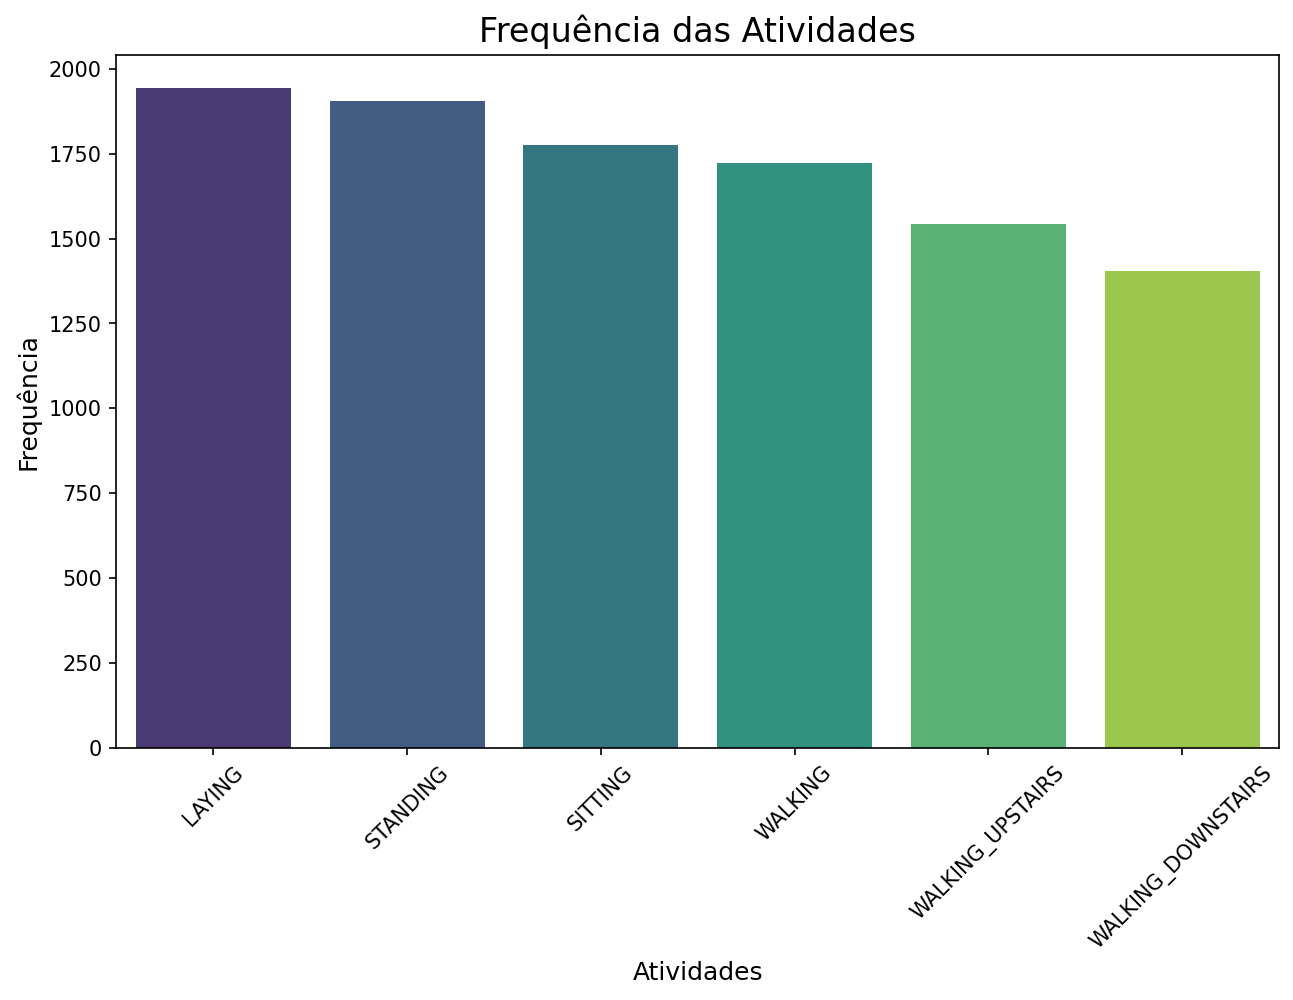

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar a frequência de cada atividade
activity_counts = data['ActivityName'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")
plt.title('Frequência das Atividades', fontsize=16)
plt.xlabel('Atividades', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário
plt.show()

As classes estão equilibradas.

In [19]:
numeric_data = data.select_dtypes(include=[np.float64])
numeric_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [20]:
import numpy as np

# Calcular a matriz de correlação
corr_matrix = numeric_data.corr()

# Selecionar colunas altamente correlacionadas (correlação > 0.95)
threshold = 0.95
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar as colunas a serem removidas
high_corr_cols = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

print(f"Número de colunas altamente correlacionadas: {len(high_corr_cols)}")
print("Colunas a serem removidas:", high_corr_cols)

# Remover colunas altamente correlacionadas
numeric_data = numeric_data.drop(columns=high_corr_cols)


Número de colunas altamente correlacionadas: 238
Colunas a serem removidas: ['tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-energy()-X', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z',

In [21]:
numeric_data.shape

(10299, 197)

In [22]:
from sklearn.decomposition import PCA
import pandas as pd

# Aplicar PCA
pca = PCA()
pca.fit(numeric_data)

# Obter a carga das variáveis nas componentes principais
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(numeric_data.shape[1])], index=numeric_data.columns)

# Identificar as variáveis mais importantes (com maior valor absoluto nas cargas)
top_features_per_pc = {}
n_top = 10  # Número de variáveis mais importantes por componente
for i in range(len(loadings.columns)):
    top_features = loadings.iloc[:, i].abs().sort_values(ascending=False).head(n_top).index
    top_features_per_pc[f'PC{i+1}'] = top_features

# Consolidar variáveis mais importantes
selected_features = set()
for features in top_features_per_pc.values():
    selected_features.update(features)

print(f"Número de variáveis selecionadas: {len(selected_features)}")
selected_features = list(selected_features)

# Criar dataset com variáveis selecionadas
filtered_data = numeric_data[selected_features]


Número de variáveis selecionadas: 197


Top 197 variáveis mais importantes:
tBodyAcc-arCoeff()-Y,4                  10.361113
tBodyGyroJerk-arCoeff()-Z,2             10.287934
tBodyGyroMag-entropy()                  10.107527
tBodyAcc-arCoeff()-Z,4                  10.068005
tBodyAcc-arCoeff()-X,4                   9.988974
                                          ...    
tGravityAcc-correlation()-X,Y            4.828499
tGravityAcc-correlation()-Y,Z            4.805660
angle(tBodyAccJerkMean),gravityMean)     4.546289
tBodyAcc-mean()-Y                        4.454495
angle(tBodyGyroJerkMean,gravityMean)     3.870025
Length: 197, dtype: float64


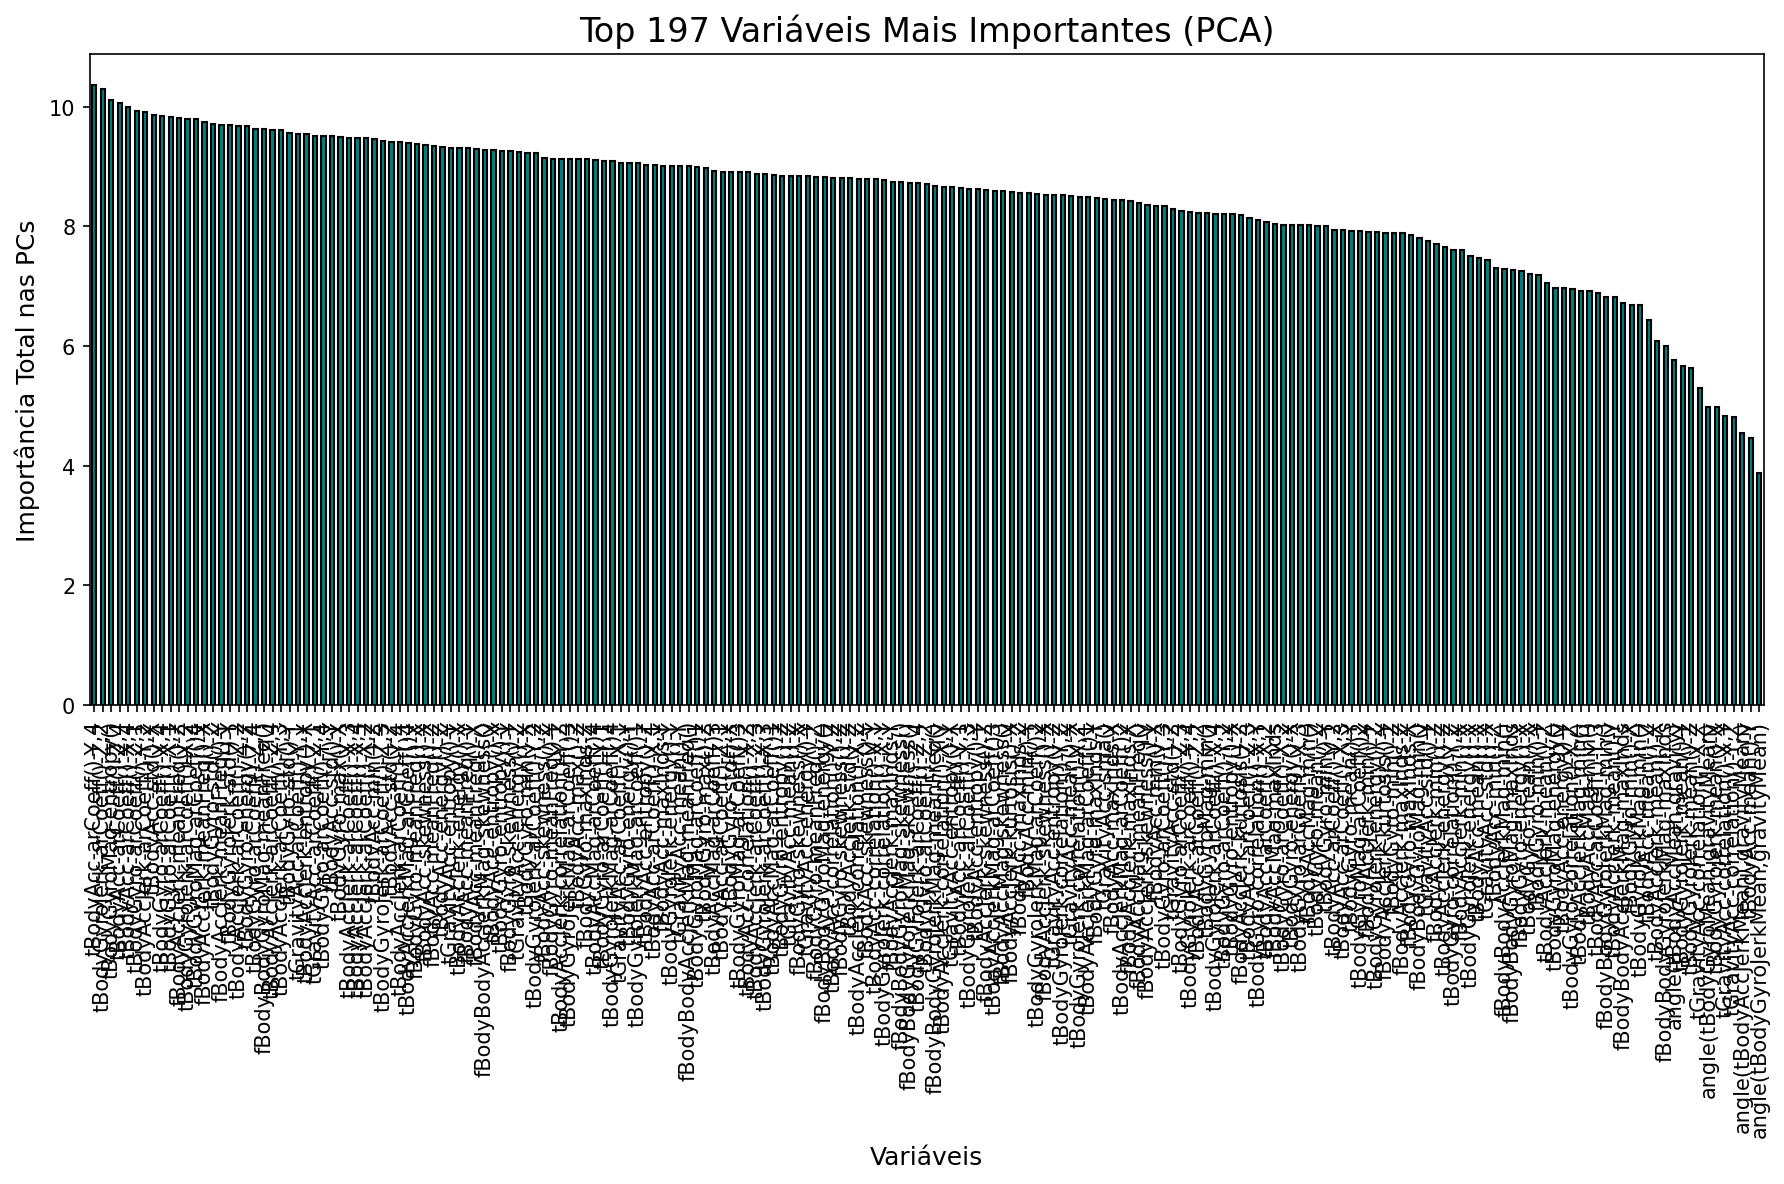

In [23]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Obter as cargas das variáveis (loadings)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(numeric_data.shape[1])],
    index=numeric_data.columns
)

# Calcular a importância total de cada variável
# A soma dos valores absolutos das cargas em todas as PCs
variable_importance = loadings.abs().sum(axis=1).sort_values(ascending=False)

# Selecionar as 50 variáveis mais importantes
top_n = 197
top_variables = variable_importance.head(top_n)

# Exibir as variáveis mais importantes
print(f"Top {top_n} variáveis mais importantes:")
print(top_variables)

# Plotar as importâncias das variáveis
plt.figure(figsize=(12, 8), dpi=150)
top_variables.plot(kind='bar', color='teal', edgecolor='black')
plt.title(f'Top {top_n} Variáveis Mais Importantes (PCA)', fontsize=16)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Importância Total nas PCs', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


O PCA não nos ajudou na redução de dimensionalidade, vamos então utilizar um modelo de Random Forest para nos ajudar a saber a importância das variáveis.




In [24]:
from sklearn.ensemble import RandomForestClassifier

# Preparar os dados (supondo que você tenha 'Activity' como alvo)
X = numeric_data
y = data['Activity']

# Treinar um modelo de Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Obter as importâncias das features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Selecionar as top N features
n_features = 50  # Defina o número de features desejado
top_features = feature_importances.head(n_features).index

print(f"Selecionadas as {n_features} features mais importantes.")

# Criar dataset com features importantes
numeric_data = numeric_data[top_features]

Selecionadas as 50 features mais importantes.


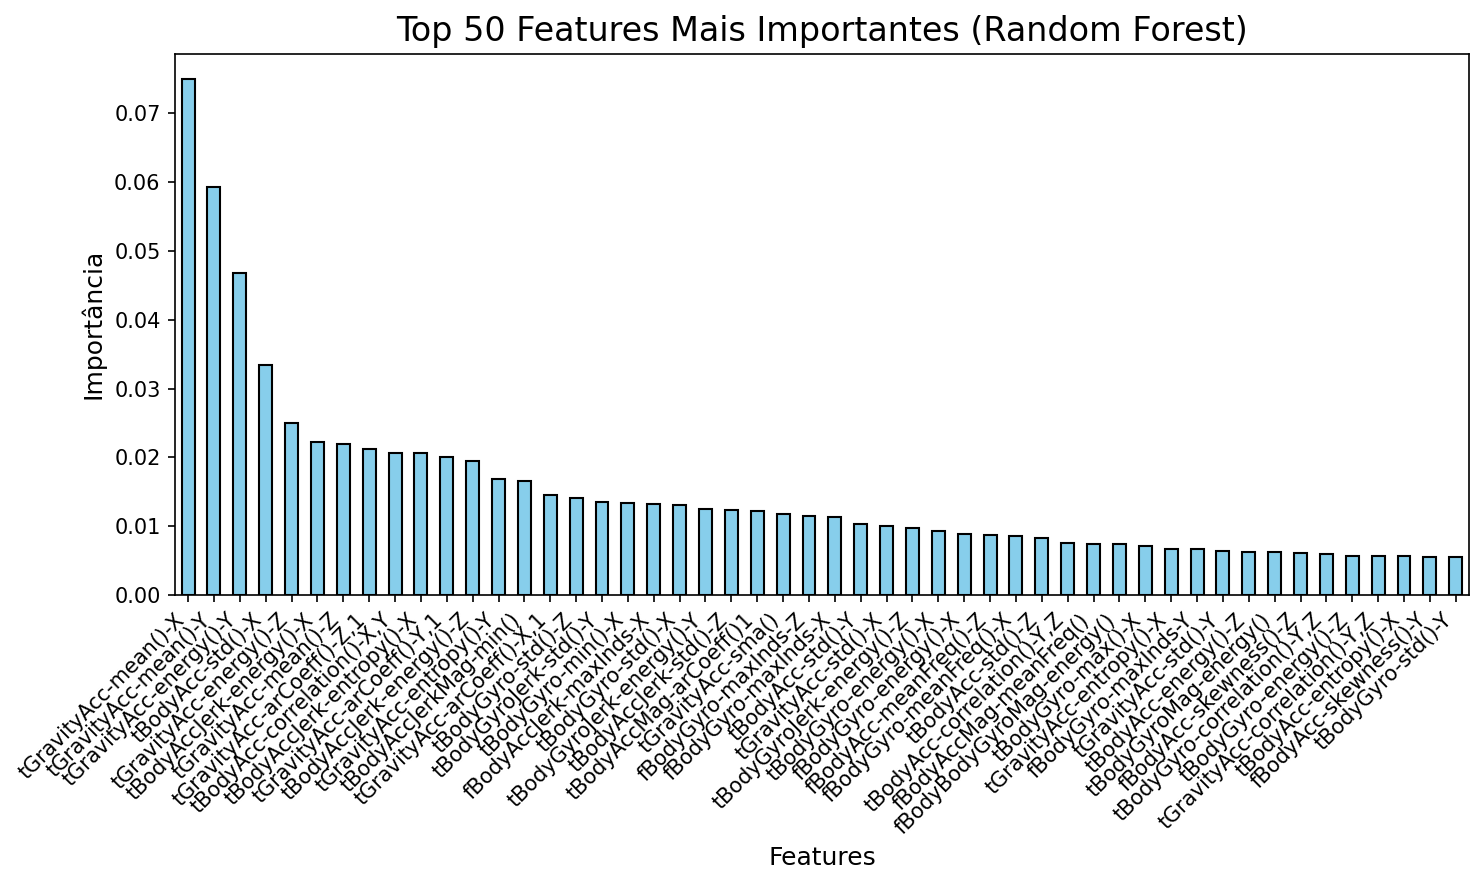

In [25]:
top_n = 50
plt.figure(figsize=(10, 6), dpi=150)
feature_importances.head(top_n).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Top {top_n} Features Mais Importantes (Random Forest)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importância', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

O RandomForest é um método de machine learning onde várias árvores de decisão são criadas para classificar um target (y) com base nas features (X), nesse método, podemos classificar quais features foram mais importantes e decisivas em classificar corretamente o target.

In [26]:
from skimpy import skim

skim(numeric_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10299  │ │ float64     │ 50    │                                                          │
│ │ Number of columns │ 50     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column              ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0 ┃ p25      ┃ p50      ┃ p75      ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ tGravityAcc-mean()- │  0 │    0 │   0.6692 │  0.5155 │ -1 │   0.8117 │   0.9218 │   0.9547 │    1 │  ▁▁  █ │  │
│ │ X                   │    │      │          │         │    │          │          │          │      │        │  │
│ │ tGravityAcc-mean()- │  0 │    0 │ 0.004039 │  0.3789 │ -1 │  -0.2429 │  -0.1436 │   0.1189 │    1 │  ▁█▂▁▂ │  │
│ │ Y                   │    │      │          │         │    │          │          │          │      │        │  │
│ │ tGravityAcc-energy( │  0 │    0 │  -0.7215 │  0.4544 │ -1 │   -0.968 │  -0.9098 │  -0.7668 │    1 │   █▁   │  │
│ │ )-Y                 │    │      │          │         │    │          │          │          │      │        │  │
│ │ tBodyAcc-std()-X    │  0 │    0 │  -0.6078 │  0.4387 │ -1 │  -0.9924 │   -0.943 │  -0.2503 │    1 │  █▂▃▁  │  │
│ │ tGravityAcc-energy( │  0 │    0 │  -0.7636 │  0.4241 │ -1 │  -0.9911 │  -0.9508 │  -0.7872 │    1 │   █▁   │  │
│ │ )-Z                 │    │      │          │         │    │          │          │          │      │        │  │
│ │ tBodyAccJerk-energy │  0 │    0 │  -0.8503 │  0.2148 │ -1 │  -0.9999 │  -0.9985 │   -0.746 │    1 │   █▁   │  │
│ │ ()-X                │    │      │          │         │    │          │          │          │      │        │  │
│ │ tGravityAcc-mean()- │  0 │    0 │  0.09215 │  0.3343 │ -1 │  -0.1167 │   0.0368 │   0.2162 │    1 │  ▁▇█▂▂ │  │
│ │ Z                   │    │      │          │         │    │          │          │          │      │        │  │
│ │ tGravityAcc-arCoeff │  0 │    0 │  -0.4281 │  0.2683 │ -1 │    -0.62 │  -0.4261 │  -0.2487 │    1 │  ▄█▆▁  │  │
│ │ ()-Z,1              │    │      │          │         │    │          │          │          │      │        │  │
│ │ tBodyAcc-correlatio │  0 │    0 │  -0.1203 │  0.3577 │ -1 │  -0.3617 │  -0.1612 │  0.08015 │    1 │ ▁▅█▄▂▁ │  │
│ │ n()-X,Y             │    │      │          │         │    │          │          │          │      │        │  │
│ │ tBodyAccJerk-entrop │  0 │    0 │ -0.08261 │  0.6527 │ -1 │  -0.7298 │  -0.3377 │   0.5994 │    1 │ █▄▁ ▇▃ │  │
│ │ y()-X               │    │      │          │         │    │          │          │          │      │        │  │
│ │ tGravityAcc-arCoeff │  0 │    0 │  -0.3436 │  0.2933 │ -1 │  -0.5461 │  -0.3418 │  -0.1434 │    1 │  ▃██▂  │  │
│ │ ()-Y,1              │    │      │          │         │    │          │          │          │      │        │  │
│ │ tBodyAccJerk-energy │  0 │    0 │  -0.9307 │  0.1179 │ -1 │  -0.9998 │  -0.9983 │  -0.8928 │    1 │   █    │  │
│ │ ()-Z                │    │      │          │        

Agora conseguimos reduzir as variáveis para as 50 que mais conseguem separar os nossos dados para classificação das atividades, com isso vamos prosseguir com o KMeans

# Aplicação do Kmeans

In [27]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalizar os dados
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Definir o intervalo de valores de K
k_values = range(2, 15)

# Listas para armazenar os resultados
inertia = []
silhouette_scores = []

# Iterar pelos valores de K
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(numeric_data_scaled)

    # Calcular a inércia
    inertia.append(kmeans.inertia_)

    # Calcular o Silhouette Score apenas se K > 1
    if k > 1:
        silhouette_avg = silhouette_score(numeric_data_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)


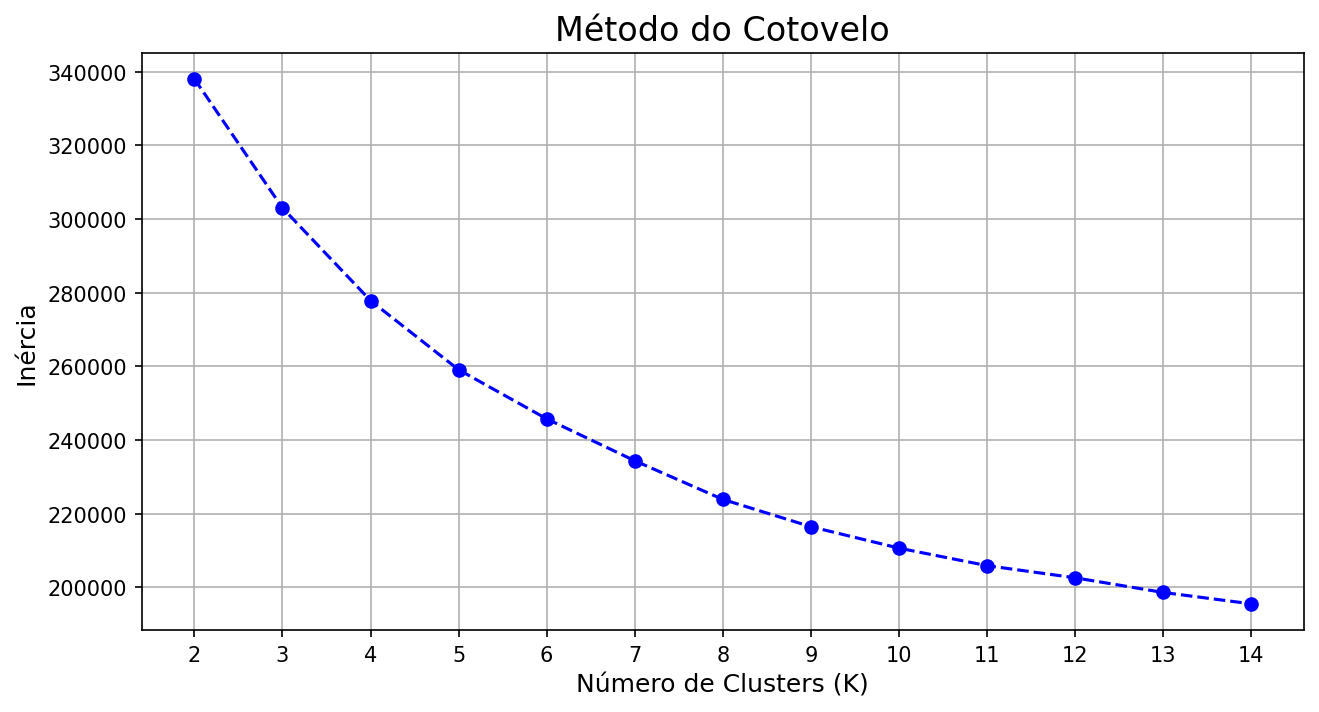

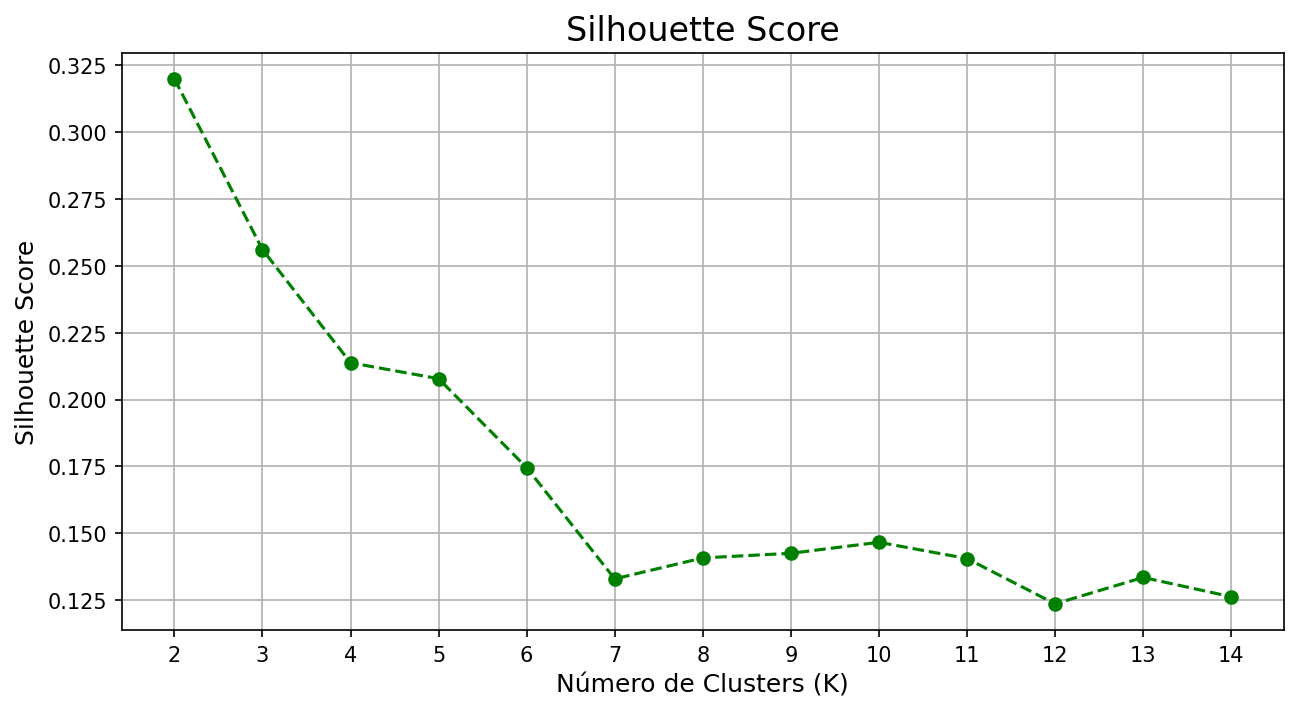

In [28]:
# Visualizar o método do cotovelo
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title('Método do Cotovelo', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.grid(True)
plt.xticks(k_values)
plt.show()

# Visualizar o Silhouette Score
plt.figure(figsize=(10, 5), dpi=150)
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='g')
plt.title('Silhouette Score', fontsize=16)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True)
plt.xticks(k_values)
plt.show()

A decisão dos clusters usando o método do cotovelo foi difícil, pois a nossa dimensinalidade é 50. Espaços de alta dimensão apresentam um fenômeno conhecido como a maldição da dimensionalidade, onde as distâncias entre os pontos de dados se tornam mais homogêneas à medida que a dimensionalidade aumenta. Ou seja, em dimensões mais altas, não há tanto contraste nas distâncias entre os pontos e os centros dos clusters.

Então analisando o silhouette score chegamos a decisão de usar 3 clusters, pois 2 tornaria a classificação muito simples, então 3 seriam o idel.

Fazendo uma análise qualitativa das atividades que estão sendo classificadas, também faria sentido, poi podemos dividi-las em 3 - atividades em movimento, atividades parado em pé e atividades parado deitado.

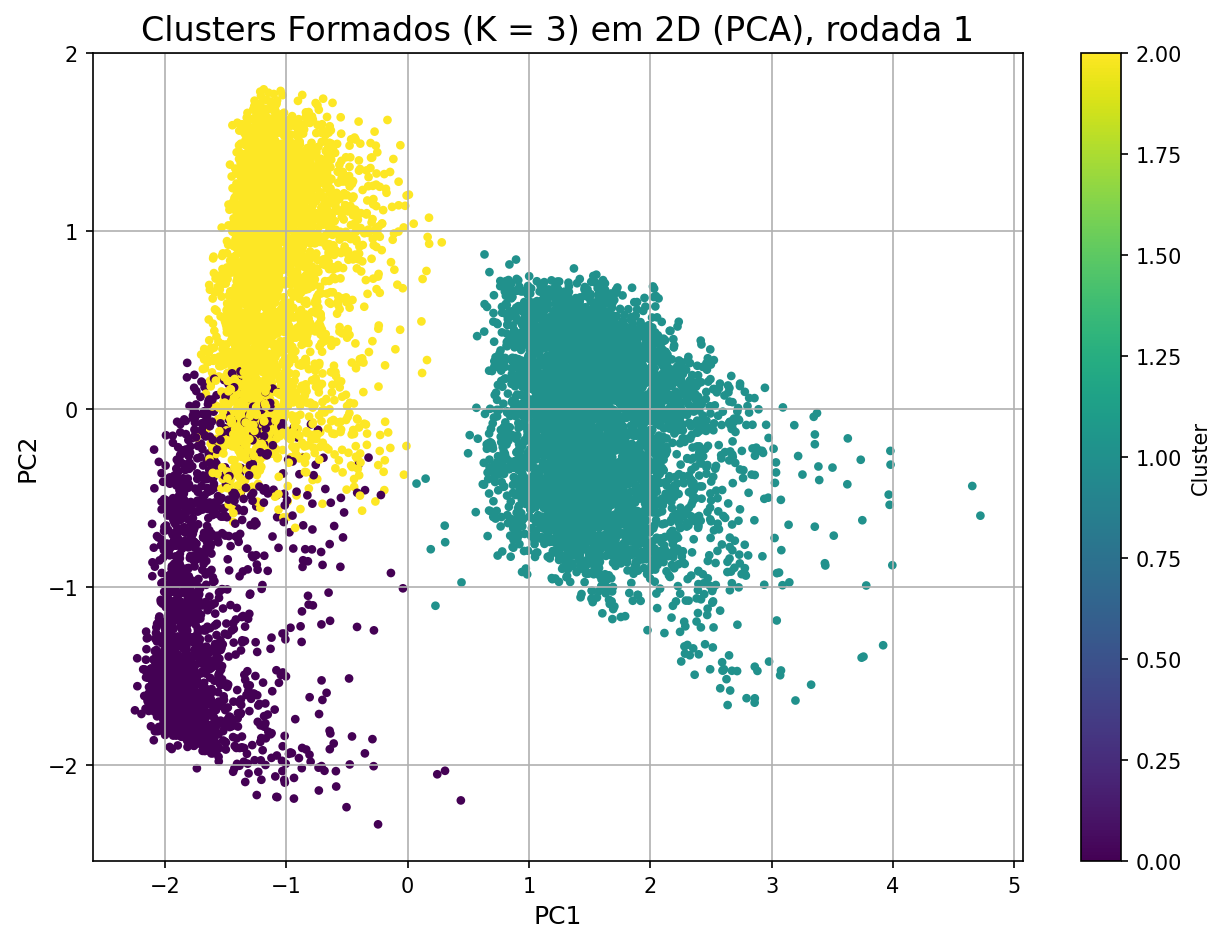

Silhouette Score para K = 3: 0.3338
Inércia para K = 3: 29186.1736
Centros dos Clusters:
   tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-energy()-Y  \
0             -0.347176              0.619134                0.042307   
1              0.911742             -0.215479               -0.898182   
2              0.915920             -0.051180               -0.913995   

   tBodyAcc-std()-X  tGravityAcc-energy()-Z  tBodyAccJerk-energy()-X  \
0         -0.963090               -0.103901                -0.999334   
1         -0.165122               -0.923755                -0.671491   
2         -0.984297               -0.920189                -0.999457   

   tGravityAcc-mean()-Z  tGravityAcc-arCoeff()-Z,1  \
0              0.558163                  -0.345706   
1             -0.080308                  -0.405265   
2              0.058263                  -0.502995   

   tBodyAcc-correlation()-X,Y  tBodyAccJerk-entropy()-X  ...  \
0                    0.078984                 -0

In [29]:
# Definir o número de clusters (K) ideal
optimal_k = 3

# Aplicar K-means com o número de clusters escolhido
kmeans = KMeans(n_clusters=optimal_k, init='k-means++')
kmeans.fit(numeric_data)

# Visualização dos Clusters usando PCA (redução de dimensionalidade para 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_data)

# Gráfico de dispersão dos clusters
plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.title(f'Clusters Formados (K = {optimal_k}) em 2D (PCA), rodada 1', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Métricas de Avaliação
silhouette = silhouette_score(numeric_data, kmeans.labels_)
print(f"Silhouette Score para K = {optimal_k}: {silhouette:.4f}")
print(f"Inércia para K = {optimal_k}: {kmeans.inertia_:.4f}")

# Interpretação dos Clusters: Exibir os centros dos clusters com as variáveis mais importantes
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,  # Centros dos clusters
    columns=numeric_data.columns
)

# Exibir os centros dos clusters
print(f"Centros dos Clusters:\n{cluster_centers}")


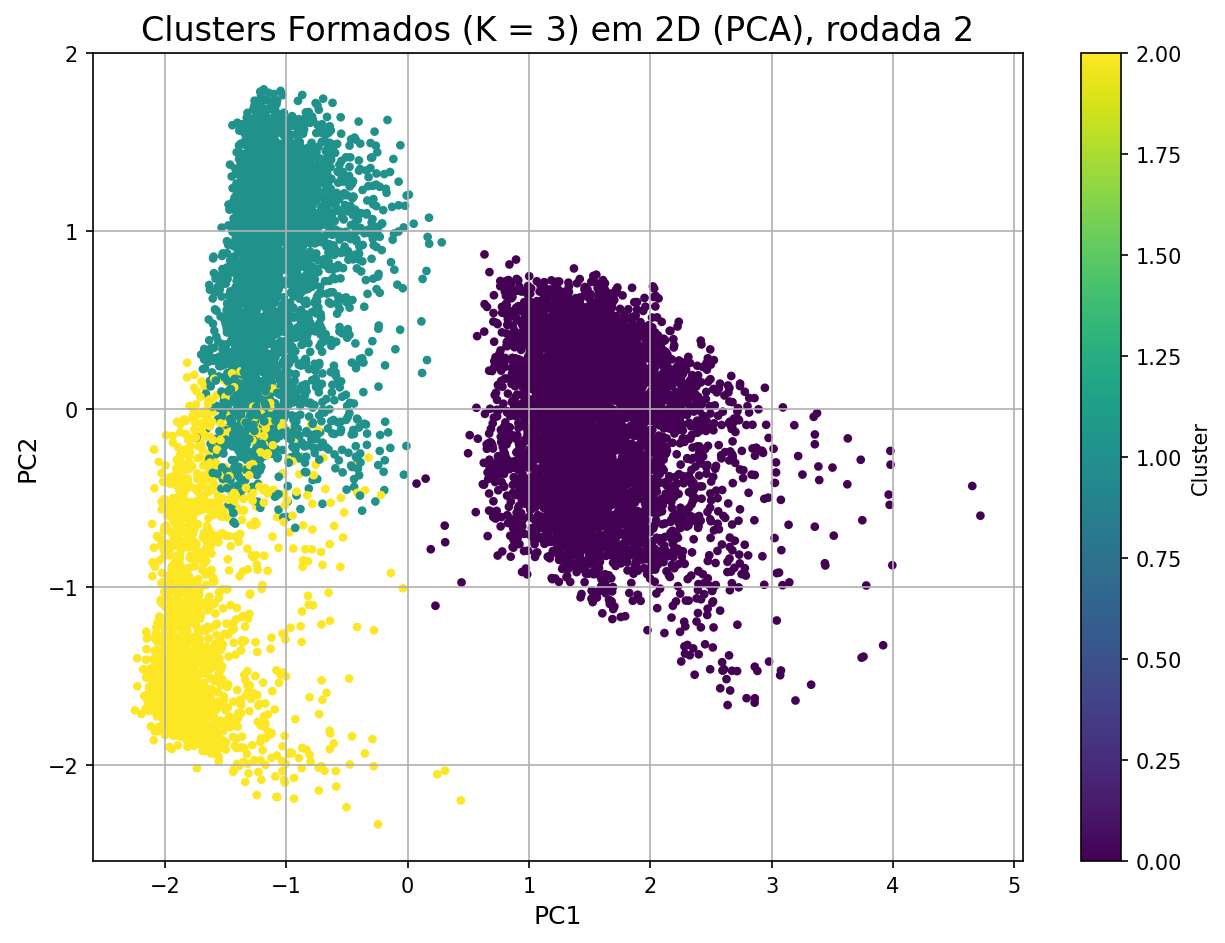

Silhouette Score para K = 3: 0.3338
Inércia para K = 3: 29186.1638
Centros dos Clusters:
   tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-energy()-Y  \
0              0.911742             -0.215479               -0.898182   
1              0.915891             -0.051054               -0.913923   
2             -0.347757              0.619242                0.042657   

   tBodyAcc-std()-X  tGravityAcc-energy()-Z  tBodyAccJerk-energy()-X  \
0         -0.165122               -0.923755                -0.671491   
1         -0.984300               -0.920207                -0.999457   
2         -0.963074               -0.103459                -0.999334   

   tGravityAcc-mean()-Z  tGravityAcc-arCoeff()-Z,1  \
0             -0.080308                  -0.405265   
1              0.058272                  -0.502983   
2              0.558397                  -0.345648   

   tBodyAcc-correlation()-X,Y  tBodyAccJerk-entropy()-X  ...  \
0                   -0.266677                  0

In [36]:
# Definir o número de clusters (K) ideal
optimal_k = 3

# Aplicar K-means com o número de clusters escolhido
kmeans = KMeans(n_clusters=optimal_k, init='k-means++')
kmeans.fit(numeric_data)

# Visualização dos Clusters usando PCA (redução de dimensionalidade para 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_data)

# Gráfico de dispersão dos clusters
plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.title(f'Clusters Formados (K = {optimal_k}) em 2D (PCA), rodada 2', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Métricas de Avaliação
silhouette = silhouette_score(numeric_data, kmeans.labels_)
print(f"Silhouette Score para K = {optimal_k}: {silhouette:.4f}")
print(f"Inércia para K = {optimal_k}: {kmeans.inertia_:.4f}")

# Interpretação dos Clusters: Exibir os centros dos clusters com as variáveis mais importantes
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,  # Centros dos clusters
    columns=numeric_data.columns
)

# Exibir os centros dos clusters
print(f"Centros dos Clusters:\n{cluster_centers}")

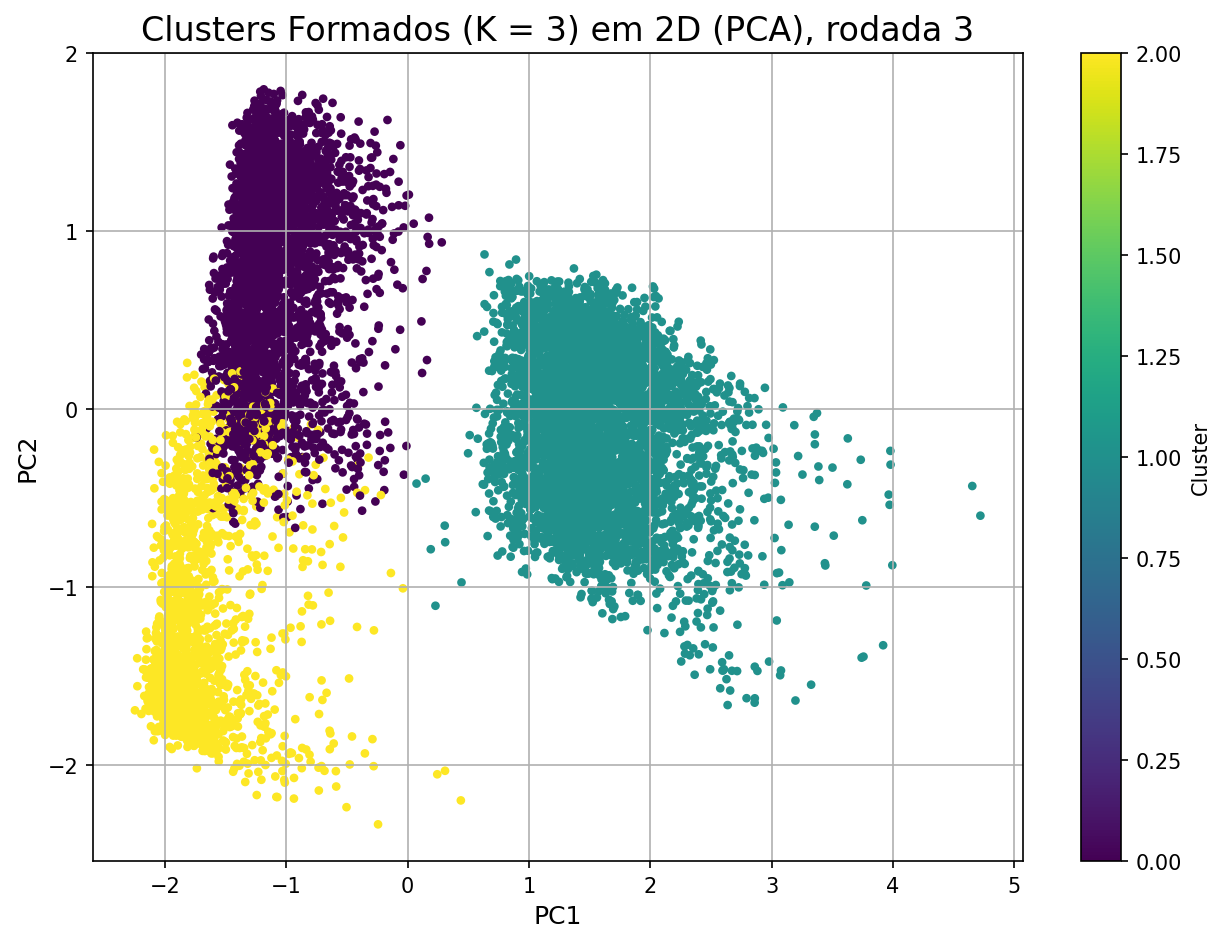

Silhouette Score para K = 3: 0.3339
Inércia para K = 3: 29186.1527
Centros dos Clusters:
   tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-energy()-Y  \
0              0.915798             -0.051072               -0.913711   
1              0.911742             -0.215479               -0.898182   
2             -0.348855              0.619945                0.043232   

   tBodyAcc-std()-X  tGravityAcc-energy()-Z  tBodyAccJerk-energy()-X  \
0         -0.984307               -0.920192                -0.999457   
1         -0.165122               -0.923755                -0.671491   
2         -0.963039               -0.102667                -0.999333   

   tGravityAcc-mean()-Z  tGravityAcc-arCoeff()-Z,1  \
0              0.058354                  -0.502849   
1             -0.080308                  -0.405265   
2              0.558750                  -0.345734   

   tBodyAcc-correlation()-X,Y  tBodyAccJerk-entropy()-X  ...  \
0                   -0.040793                 -0

In [31]:
# Definir o número de clusters (K) ideal
optimal_k = 3

# Aplicar K-means com o número de clusters escolhido
kmeans = KMeans(n_clusters=optimal_k, init='k-means++')
kmeans.fit(numeric_data)

# Visualização dos Clusters usando PCA (redução de dimensionalidade para 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_data)

# Gráfico de dispersão dos clusters
plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.title(f'Clusters Formados (K = {optimal_k}) em 2D (PCA), rodada 3', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Métricas de Avaliação
silhouette = silhouette_score(numeric_data, kmeans.labels_)
print(f"Silhouette Score para K = {optimal_k}: {silhouette:.4f}")
print(f"Inércia para K = {optimal_k}: {kmeans.inertia_:.4f}")

# Interpretação dos Clusters: Exibir os centros dos clusters com as variáveis mais importantes
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,  # Centros dos clusters
    columns=numeric_data.columns
)

# Exibir os centros dos clusters
print(f"Centros dos Clusters:\n{cluster_centers}")

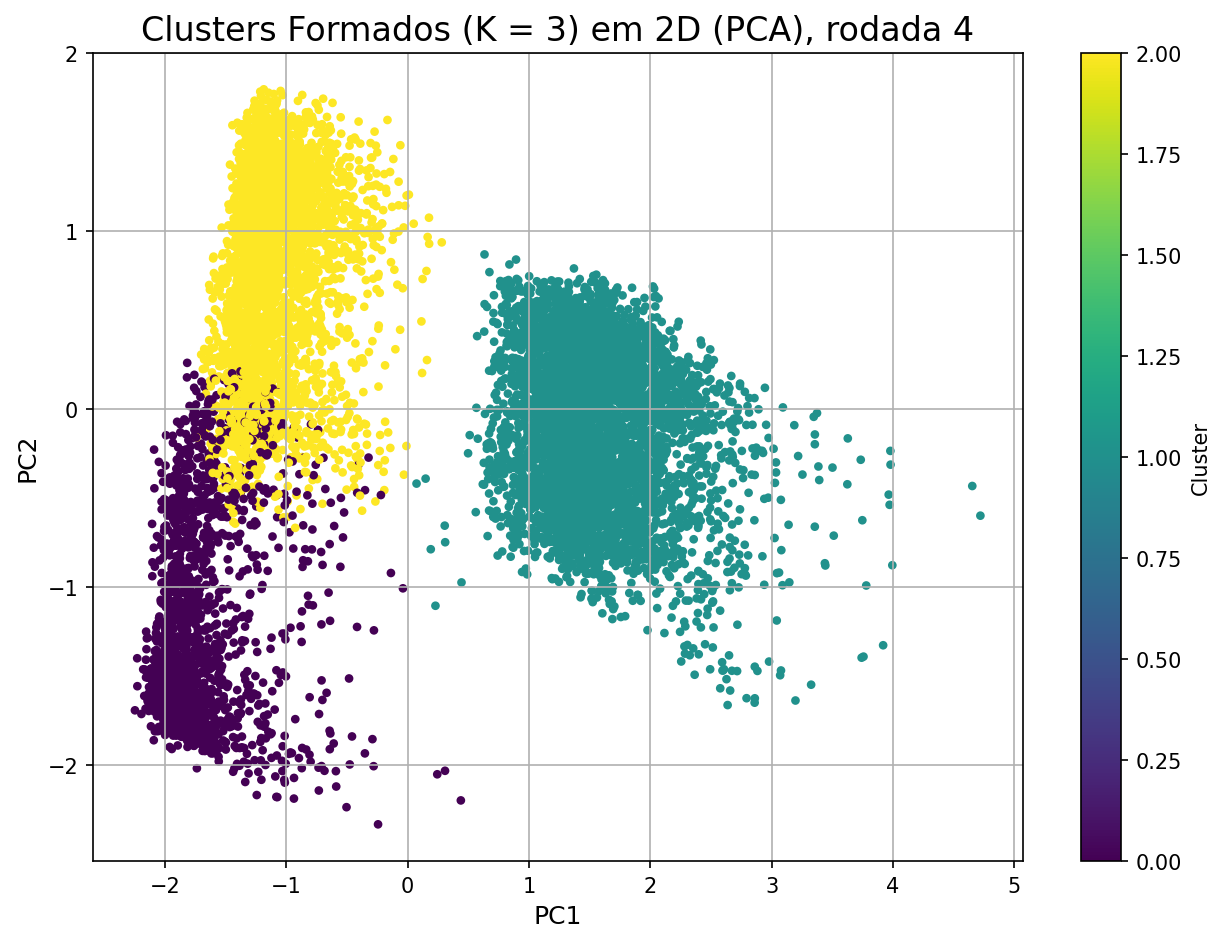

Silhouette Score para K = 3: 0.3338
Inércia para K = 3: 29186.1638
Centros dos Clusters:
   tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-energy()-Y  \
0             -0.347757              0.619242                0.042657   
1              0.911742             -0.215479               -0.898182   
2              0.915891             -0.051054               -0.913923   

   tBodyAcc-std()-X  tGravityAcc-energy()-Z  tBodyAccJerk-energy()-X  \
0         -0.963074               -0.103459                -0.999334   
1         -0.165122               -0.923755                -0.671491   
2         -0.984300               -0.920207                -0.999457   

   tGravityAcc-mean()-Z  tGravityAcc-arCoeff()-Z,1  \
0              0.558397                  -0.345648   
1             -0.080308                  -0.405265   
2              0.058272                  -0.502983   

   tBodyAcc-correlation()-X,Y  tBodyAccJerk-entropy()-X  ...  \
0                    0.079016                 -0

In [32]:
# Definir o número de clusters (K) ideal
optimal_k = 3

# Aplicar K-means com o número de clusters escolhido
kmeans = KMeans(n_clusters=optimal_k, init='k-means++')
kmeans.fit(numeric_data)

# Visualização dos Clusters usando PCA (redução de dimensionalidade para 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_data)

# Gráfico de dispersão dos clusters
plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.title(f'Clusters Formados (K = {optimal_k}) em 2D (PCA), rodada 4', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Métricas de Avaliação
silhouette = silhouette_score(numeric_data, kmeans.labels_)
print(f"Silhouette Score para K = {optimal_k}: {silhouette:.4f}")
print(f"Inércia para K = {optimal_k}: {kmeans.inertia_:.4f}")

# Interpretação dos Clusters: Exibir os centros dos clusters com as variáveis mais importantes
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,  # Centros dos clusters
    columns=numeric_data.columns
)

# Exibir os centros dos clusters
print(f"Centros dos Clusters:\n{cluster_centers}")

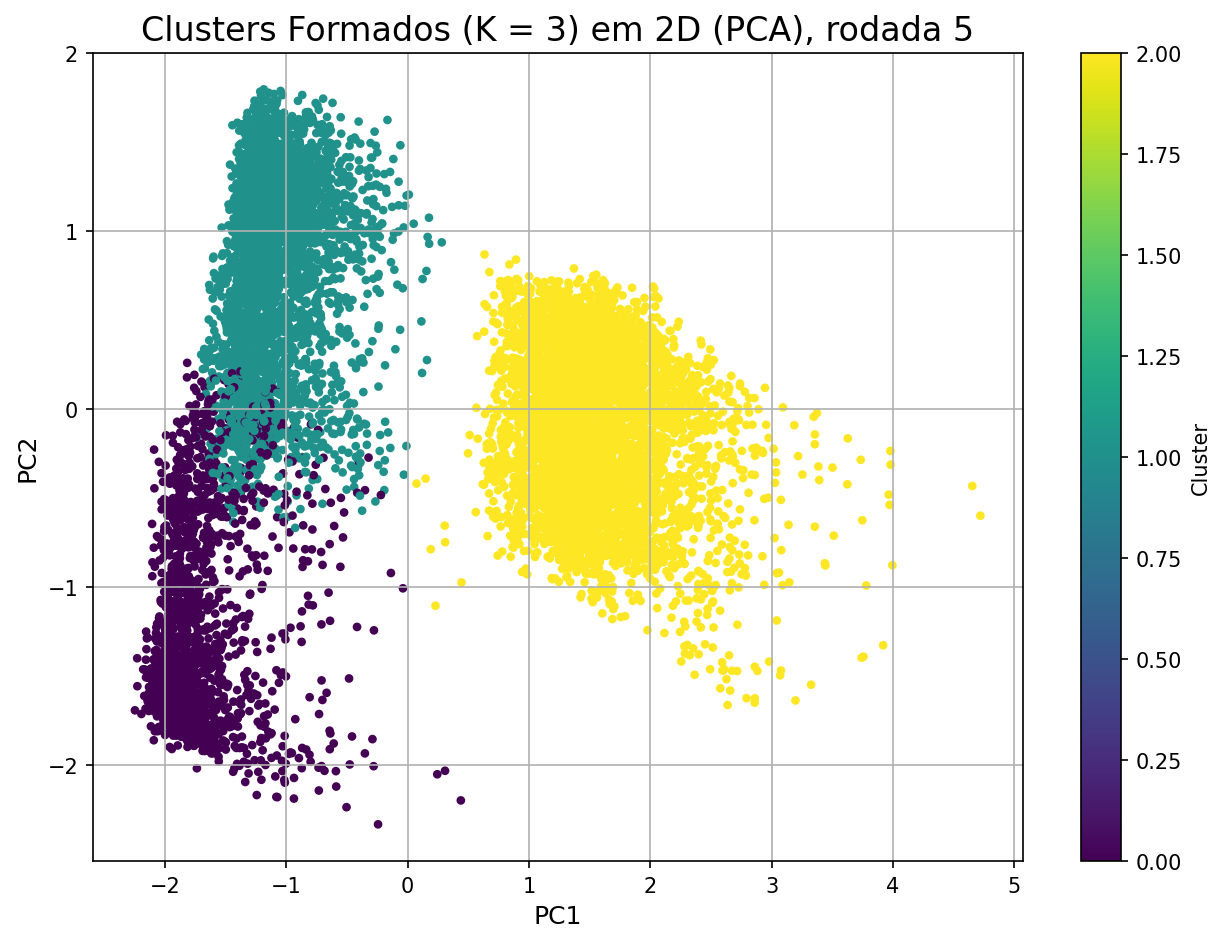

Silhouette Score para K = 3: 0.3338
Inércia para K = 3: 29186.1736
Centros dos Clusters:
   tGravityAcc-mean()-X  tGravityAcc-mean()-Y  tGravityAcc-energy()-Y  \
0             -0.347176              0.619134                0.042307   
1              0.915920             -0.051180               -0.913995   
2              0.911742             -0.215479               -0.898182   

   tBodyAcc-std()-X  tGravityAcc-energy()-Z  tBodyAccJerk-energy()-X  \
0         -0.963090               -0.103901                -0.999334   
1         -0.984297               -0.920189                -0.999457   
2         -0.165122               -0.923755                -0.671491   

   tGravityAcc-mean()-Z  tGravityAcc-arCoeff()-Z,1  \
0              0.558163                  -0.345706   
1              0.058263                  -0.502995   
2             -0.080308                  -0.405265   

   tBodyAcc-correlation()-X,Y  tBodyAccJerk-entropy()-X  ...  \
0                    0.078984                 -0

In [35]:
# Definir o número de clusters (K) ideal
optimal_k = 3

# Aplicar K-means com o número de clusters escolhido
kmeans = KMeans(n_clusters=optimal_k, init='k-means++')
kmeans.fit(numeric_data)

# Visualização dos Clusters usando PCA (redução de dimensionalidade para 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_data)

# Gráfico de dispersão dos clusters
plt.figure(figsize=(10, 7), dpi=150)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=10)
plt.title(f'Clusters Formados (K = {optimal_k}) em 2D (PCA), rodada 5', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Métricas de Avaliação
silhouette = silhouette_score(numeric_data, kmeans.labels_)
print(f"Silhouette Score para K = {optimal_k}: {silhouette:.4f}")
print(f"Inércia para K = {optimal_k}: {kmeans.inertia_:.4f}")

# Interpretação dos Clusters: Exibir os centros dos clusters com as variáveis mais importantes
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,  # Centros dos clusters
    columns=numeric_data.columns
)

# Exibir os centros dos clusters
print(f"Centros dos Clusters:\n{cluster_centers}")

As 5 rodadas dos clusters nos mostra que a clusterização está bem consistente, obtendo resultados semelhantes nas rodadas.

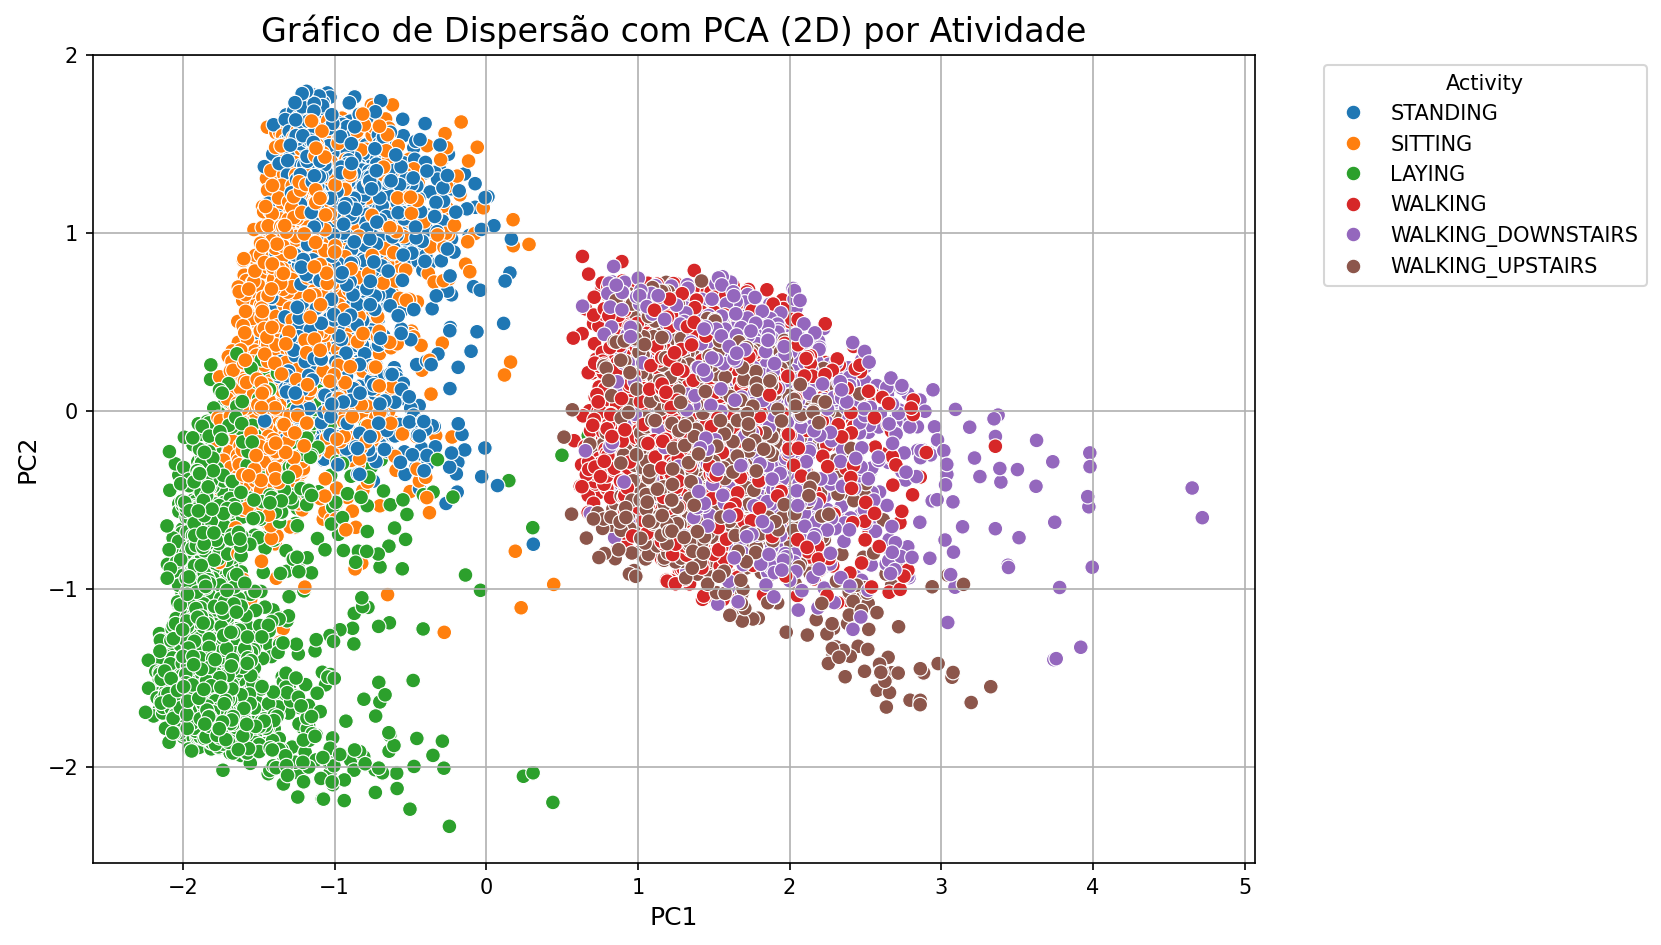

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar a redução de dimensionalidade com PCA (reduzindo para 2 componentes principais)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numeric_data)

# Criar um DataFrame com as componentes principais e a atividade como label
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Activity'] = data['Activity']
pca_df['ActivityName'] = data['ActivityName']

# Plotar o gráfico de dispersão com as atividades como cor
plt.figure(figsize=(10, 7), dpi=150)
sns.scatterplot(x='PC1', y='PC2', hue='ActivityName', data=pca_df, palette='tab10', s=50, marker='o')

# Customização do gráfico
plt.title('Gráfico de Dispersão com PCA (2D) por Atividade', fontsize=16)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



Analisando o gráfico de dispersão original podemos ter certeza que o kmeans foi muito bem sucedido ao agrupar as atividades, como dito anteriormente podemos agrupa-las entre, atividade feitas em movimento (pontos vermelhos, roxos e marrons), atividades feitas parado e em pé(pontos azuis e amarelos) e atividades feitas parado e deitado (pontos verdes)